In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

results_dir = "./resluts"

In [ ]:

file_names = [
    "res_1.csv", "res_2_rfe.csv", "res_2_cs.csv", 
    "res_2_dtc.csv", "res_3.csv", "res_pca.csv", "res_mds.csv", "res_tsne.csv"
]

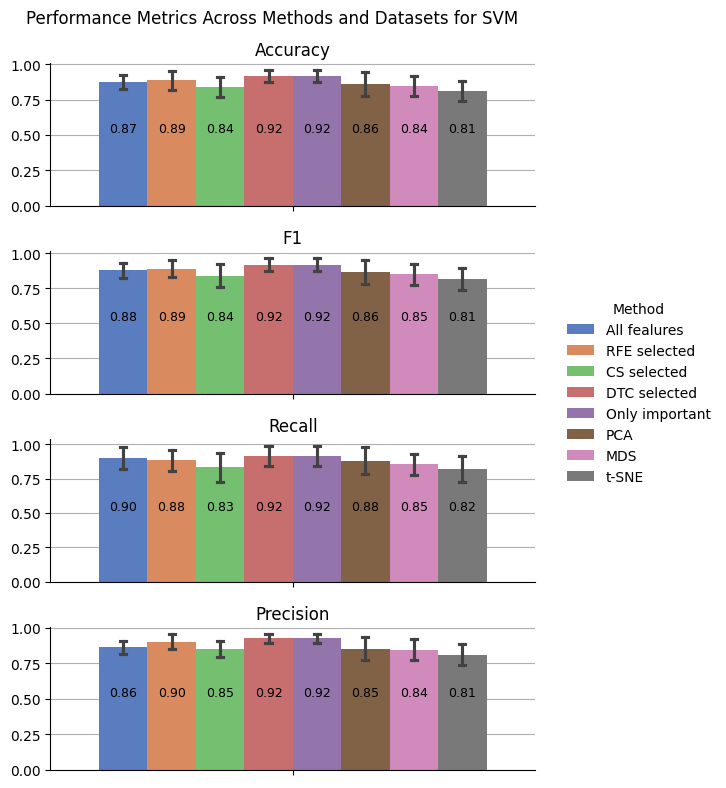

In [88]:
legend_mapping = {
    'res_1': 'All fealures',
    'res_2_cs': 'CS selected',
    'res_2_dtc': 'DTC selected',
    'res_2_rfe': 'RFE selected',
    'res_3': 'Only important',
    'res_mds': 'MDS',
    'res_pca': 'PCA',
    'res_tsne': 't-SNE'
}

dfs = []
for file in file_names:
    df = pd.read_csv(os.path.join(results_dir, file))
    file_name = file.replace(".csv", "")  
    # df["source"] = file.replace(".csv", "")  
    df["source"] = legend_mapping[file_name]
    df = df[df["name"]=="SVM"]
    df = df[["name", "accuracy", "f1", "recall", "precision", "source"]]
    dfs.append(df)

all_results = pd.concat(dfs, ignore_index=True)

melted = all_results.melt(id_vars=["name", "source"], 
                          value_vars=["accuracy", "f1", "recall", "precision"],
                          var_name="metric", value_name="score")

g = sns.FacetGrid(melted, col="metric", col_wrap=1, height=2, aspect=2, sharey=False)
g.map_dataframe(sns.barplot, x="name", y="score", hue="source", ci='sd', capsize=0.1, palette="muted")

g.set_xlabels('')
g.set_axis_labels("", "")
g.set_titles("{col_name}")


for ax in g.axes.flat:
    title = ax.get_title()
    ax.set_title(title[0].upper() + title[1:])

for ax in g.axes.flatten():
    ax.yaxis.grid(True)  
    ax.set_axisbelow(True)
    ax.set_xticklabels([])
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):
            if height <0.01: continue
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                0.5,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=9
            )
g.add_legend(
    title="Method", 
    bbox_to_anchor=(1.02, 0.5), 
    loc='center left', 
    borderaxespad=0
)
plt.subplots_adjust(top=0.93, right=0.85) 
g.figure.suptitle("Performance Metrics Across Methods and Datasets for SVM", fontsize=12)
plt.tight_layout()
g.savefig(results_dir+"/svm.png", dpi=300, bbox_inches='tight')
plt.show()


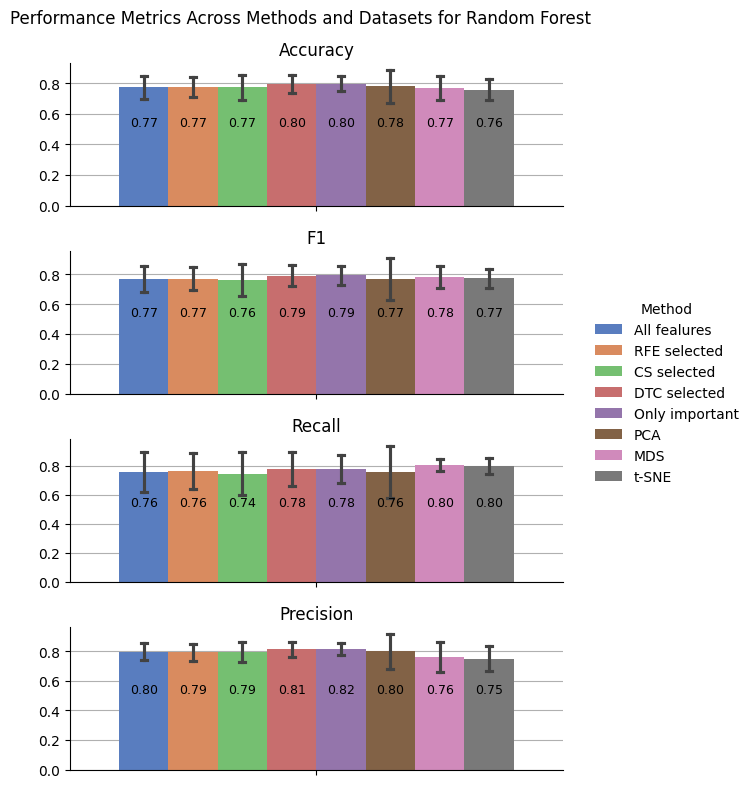

In [87]:
legend_mapping = {
    'res_1': 'All fealures',
    'res_2_cs': 'CS selected',
    'res_2_dtc': 'DTC selected',
    'res_2_rfe': 'RFE selected',
    'res_3': 'Only important',
    'res_mds': 'MDS',
    'res_pca': 'PCA',
    'res_tsne': 't-SNE'
}

dfs = []
for file in file_names:
    df = pd.read_csv(os.path.join(results_dir, file))
    file_name = file.replace(".csv", "")  
    # df["source"] = file.replace(".csv", "")  
    df["source"] = legend_mapping[file_name]
    df = df[df["name"]=="Random Forest"]
    df = df[["name", "accuracy", "f1", "recall", "precision", "source"]]
    dfs.append(df)

all_results = pd.concat(dfs, ignore_index=True)

melted = all_results.melt(id_vars=["name", "source"], 
                          value_vars=["accuracy", "f1", "recall", "precision"],
                          var_name="metric", value_name="score")

g = sns.FacetGrid(melted, col="metric", col_wrap=1, height=2, aspect=2, sharey=False)
g.map_dataframe(sns.barplot, x="name", y="score", hue="source", ci='sd', capsize=0.1, palette="muted")

g.set_xlabels('')
g.set_axis_labels("", "")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    title = ax.get_title()
    ax.set_title(title[0].upper() + title[1:])

for ax in g.axes.flatten():
    ax.yaxis.grid(True)  
    ax.set_axisbelow(True)
    ax.set_xticklabels([])
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):
            if height <0.01: continue
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                0.5,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=9
            )
g.add_legend(
    title="Method", 
    bbox_to_anchor=(1.02, 0.5), 
    loc='center left', 
    borderaxespad=0
)
plt.subplots_adjust(top=0.93, right=0.85) 
g.figure.suptitle("Performance Metrics Across Methods and Datasets for Random Forest", fontsize=12)
plt.tight_layout()
# plt.savefig(results_dir+"/random_forest.png")
g.savefig(results_dir+"/random_forest.png", dpi=300, bbox_inches='tight')

plt.show()


In [35]:
res_1 = pd.read_csv(os.path.join(results_dir, "res_1.csv"))
# res_2 = pd.read_csv(os.path.join(results_dir, "res_2.csv"))
res_3 = pd.read_csv(os.path.join(results_dir, "res_3.csv"))
res_pca = pd.read_csv(os.path.join(results_dir, "res_pca.csv"))
res_mds = pd.read_csv(os.path.join(results_dir, "res_mds.csv"))
res_tsne = pd.read_csv(os.path.join(results_dir, "res_tsne.csv"))

results = [
    ("the set including all features", res_1),
    # ("the set of features selected by RFE ", res_2[res_2["selection"]=="RFE"]),
    # ("the set of features selected by CS ", res_2[res_2["selection"]=="CS"]),
    # ("the set of features selected by Decision Tree Classifier ", res_2[res_2["selection"]=="Decision Tree Classifier"]),
    ("the set including only relevant (important) features", res_3),
    ("data projection obtained via PCA", res_pca),
    ("data projection obtained via multidimensional scaling", res_mds),
    ("data projection obtained via tSNE", res_tsne)
]


In [37]:
def plot_metrics(df, name, metrics):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.barplot(data=df, x='name', y=metric, ci='sd', palette='muted', capsize=0.1, ax=axes[i])
        axes[i].set_title(f"{metric.capitalize()}")
        axes[i].set_ylabel(metric)
        axes[i].set_xlabel("")
        axes[i].set_ylim(0, 1)

        sns.despine(ax=axes[i])

    fig.suptitle(f"Evaluation Metrics for {name}", fontsize=16)
    plt.tight_layout()
    # plt.savefig(results_dir + "/name.png")
    plt.show()


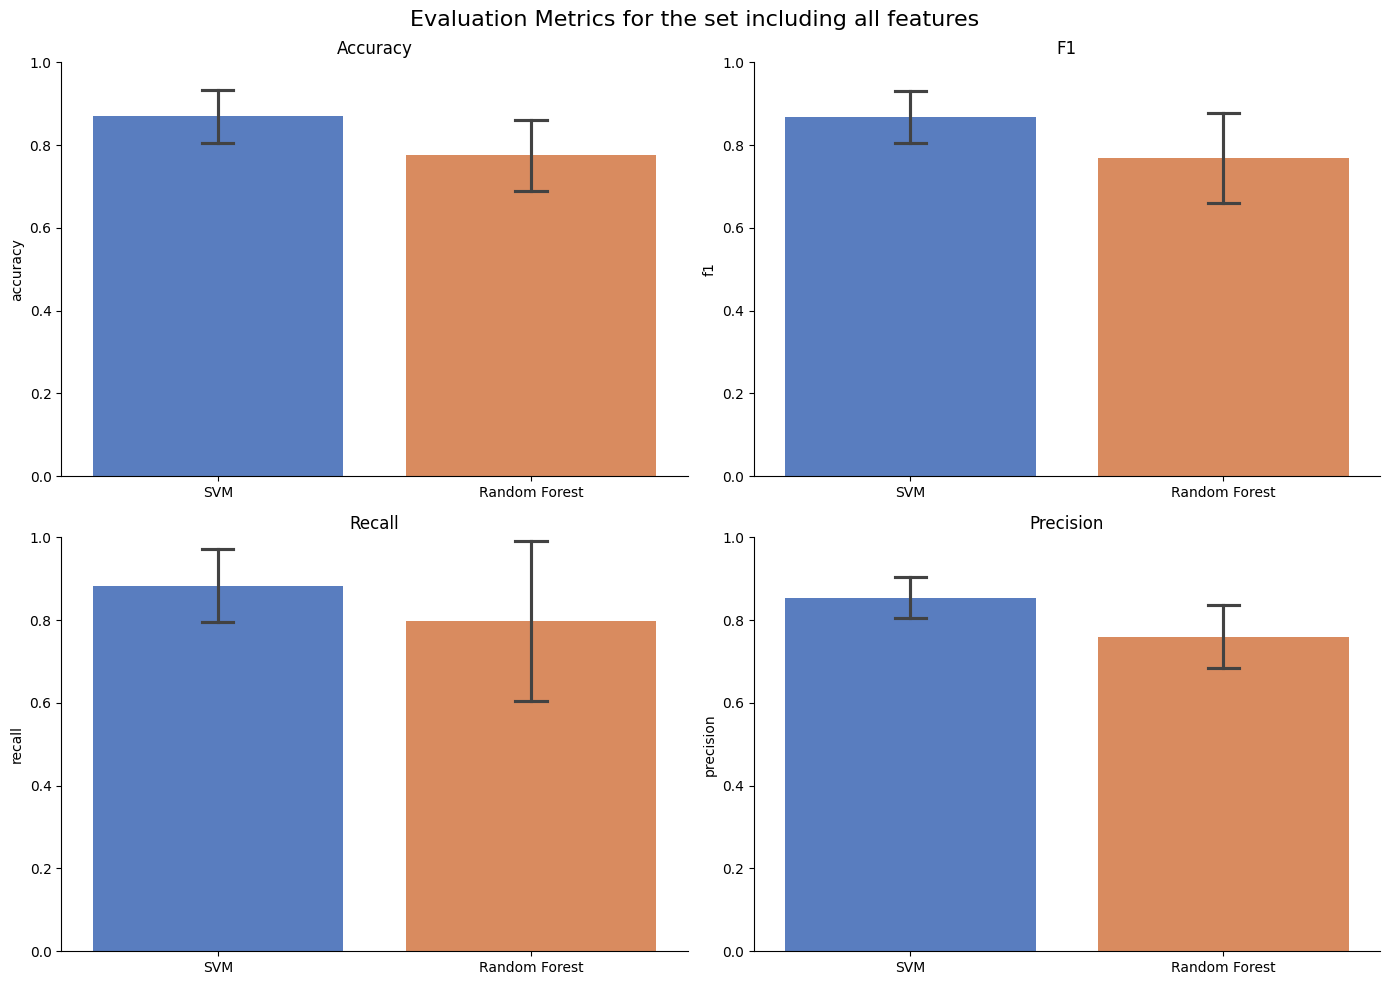

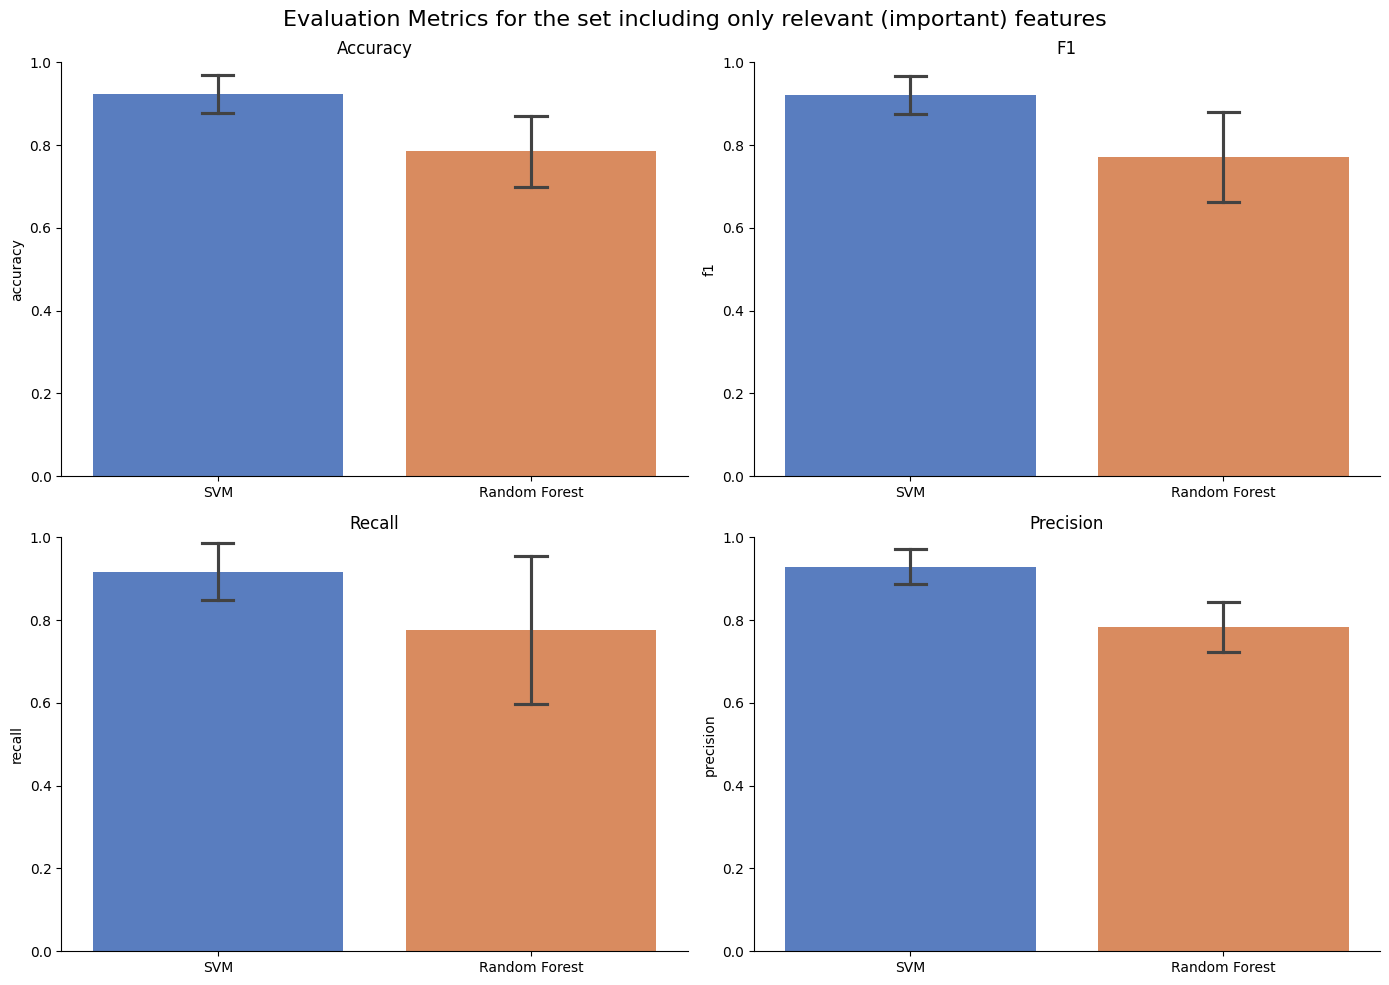

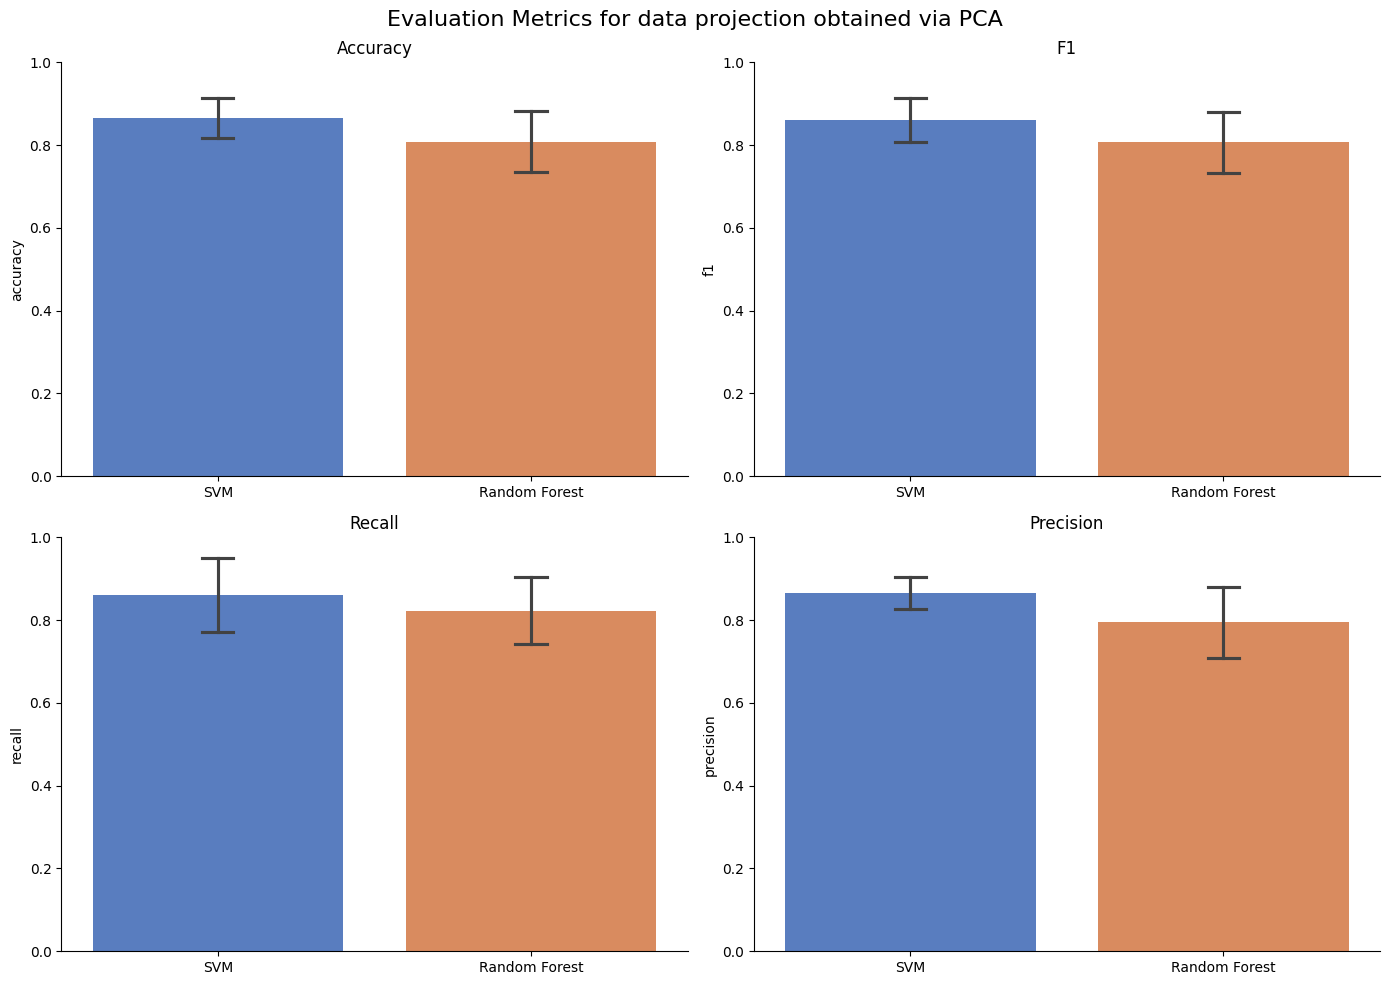

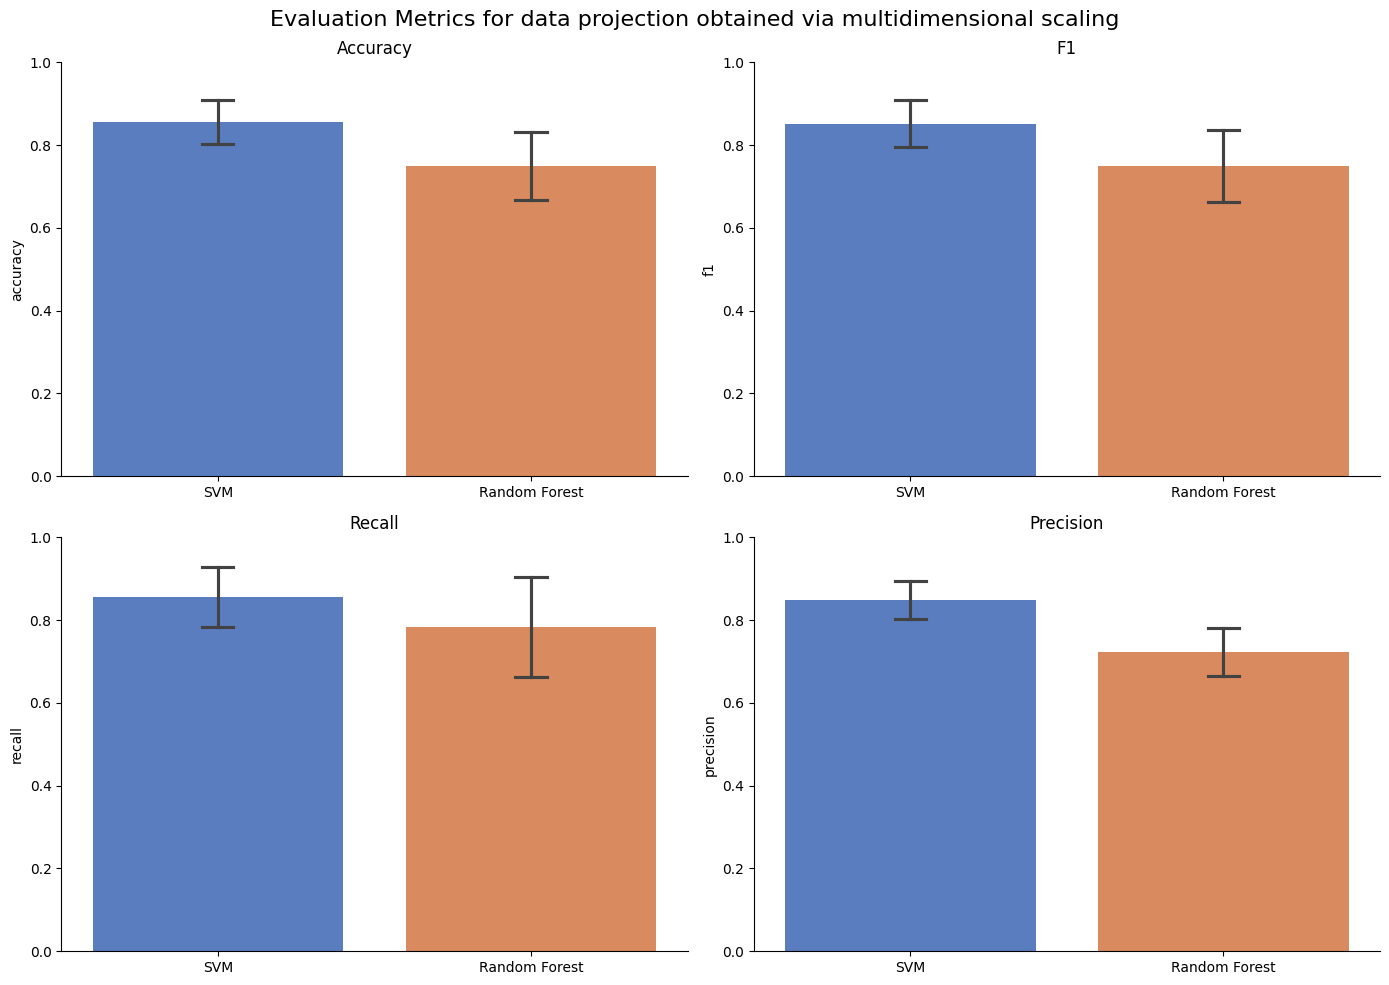

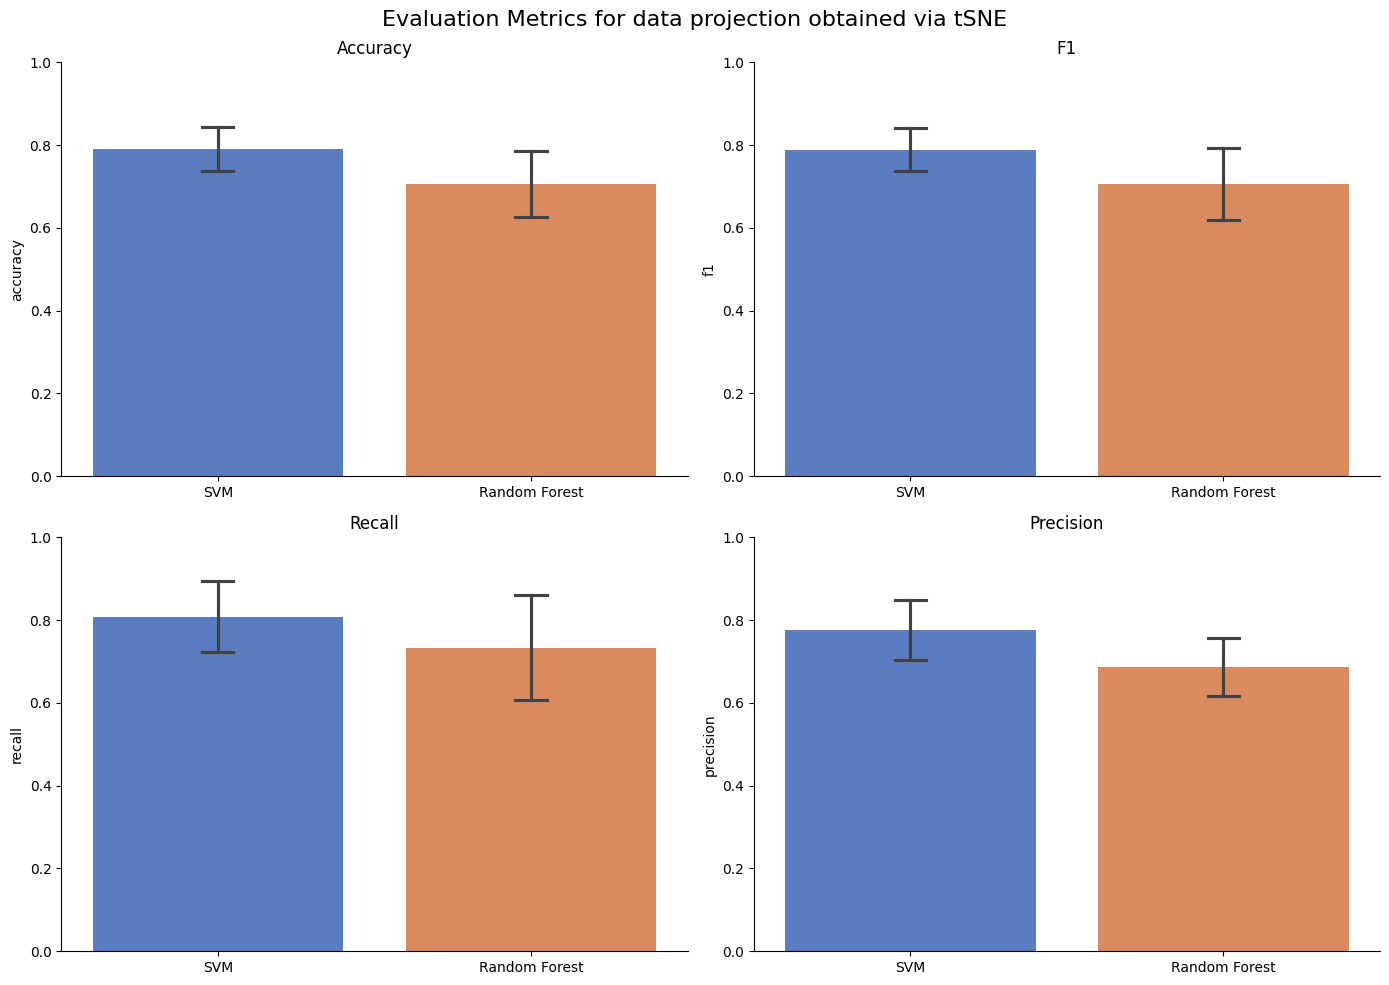

In [38]:
metrics = ["accuracy", "f1", "recall", "precision"]

for name, df in results:
    plot_metrics(df, name, metrics)